In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Training Set 

In [2]:
df_train=pd.read_csv('sanbercode_train.csv')
df_train.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,27247,59,Pemerintah Negara,139616,Master,14,Menikah,Ekesekutif Managerial,Laki2,0.0,0.0,50.0,1
1,1640,52,Wiraswasta,158993,SMA,9,Cerai,Servis Lainnya,Perempuan,0.0,0.0,38.0,0
2,45206,52,Pekerja Bebas Bukan Perusahan,284648,SMA,9,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,99.0,1
3,16154,45,Wiraswasta,132847,SMA,9,Belum Pernah Menikah,Pembersih,Perempuan,0.0,0.0,40.0,0
4,43023,28,Wiraswasta,103432,SMA,9,Belum Pernah Menikah,Supir,Laki2,0.0,0.0,45.0,1


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38393 entries, 0 to 38392
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38393 non-null  int64  
 1   Umur                   38393 non-null  int64  
 2   Kelas Pekerja          38393 non-null  object 
 3   Berat Akhir            38393 non-null  int64  
 4   Pendidikan             38393 non-null  object 
 5   Jmlh Tahun Pendidikan  38393 non-null  int64  
 6   Status Perkawinan      38393 non-null  object 
 7   Pekerjaan              38393 non-null  object 
 8   Jenis Kelamin          38393 non-null  object 
 9   Keuntungan Kapital     38393 non-null  float64
 10  Kerugian Capital       38393 non-null  float64
 11  Jam per Minggu         38393 non-null  float64
 12  Gaji                   38393 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 3.8+ MB


In [4]:
df_train.isnull().sum()

id                       0
Umur                     0
Kelas Pekerja            0
Berat Akhir              0
Pendidikan               0
Jmlh Tahun Pendidikan    0
Status Perkawinan        0
Pekerjaan                0
Jenis Kelamin            0
Keuntungan Kapital       0
Kerugian Capital         0
Jam per Minggu           0
Gaji                     0
dtype: int64

In [5]:
df_train.duplicated().sum()

0

# EDA

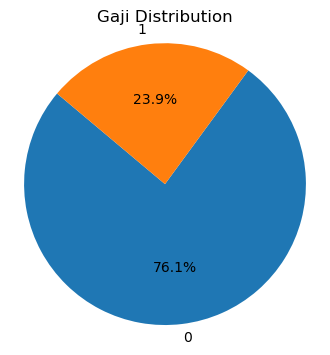

In [6]:
gaji_counts = df_train['Gaji'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(gaji_counts, labels=gaji_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gaji Distribution')
plt.axis('equal')
plt.show()

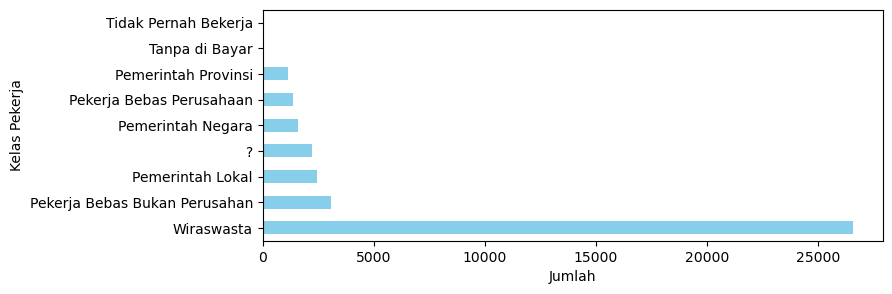

In [7]:
kelas_pekerja_counts = df_train['Kelas Pekerja'].value_counts(dropna=False)

plt.figure(figsize=(8, 3))
kelas_pekerja_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Jumlah')
plt.ylabel('Kelas Pekerja')
plt.show()

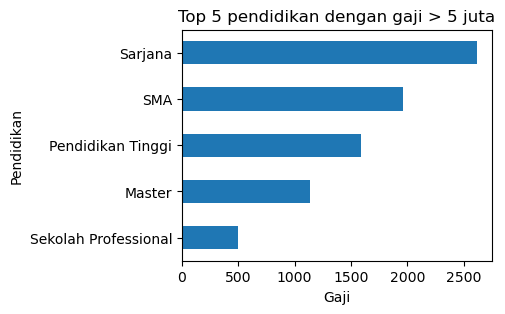

In [8]:
gaji_besar = df_train[df_train['Gaji'] == 1]
pendidikan_gaji_besar = gaji_besar['Pendidikan'].value_counts().head(5)
plt.figure(figsize=(4, 3))
pendidikan_gaji_besar = pendidikan_gaji_besar.sort_values(ascending=True)
pendidikan_gaji_besar.plot(kind='barh')
plt.title('Top 5 pendidikan dengan gaji > 5 juta')
plt.xlabel('Gaji')
plt.ylabel('Pendidikan')
plt.show()

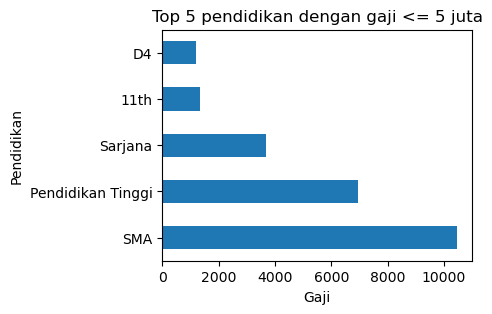

In [9]:
gaji_kecil = df_train[df_train['Gaji'] == 0]
pendidikan_gaji_kecil = gaji_kecil['Pendidikan'].value_counts().head(5)
plt.figure(figsize=(4, 3))
pendidikan_gaji_kecil = pendidikan_gaji_kecil.sort_values(ascending=False)
pendidikan_gaji_kecil.plot(kind='barh')
plt.title('Top 5 pendidikan dengan gaji <= 5 juta')
plt.xlabel('Gaji')
plt.ylabel('Pendidikan')
plt.show()

In [10]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[['Tidak Pernah Bekerja', 'Tanpa di Bayar', 'Pekerja Bebas Bukan Perusahan','?', 
                                              'Pemerintah Lokal', 'Pemerintah Provinsi', 'Pemerintah Negara', 'Pekerja Bebas Perusahaan','Wiraswasta']])
df_train['Kelas Pekerja'] = ordinal_encoder.fit_transform(df_train[['Kelas Pekerja']])
df_train['Kelas Pekerja'] = df_train['Kelas Pekerja'].astype(int)
df_train.head() 

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,27247,59,6,139616,Master,14,Menikah,Ekesekutif Managerial,Laki2,0.0,0.0,50.0,1
1,1640,52,8,158993,SMA,9,Cerai,Servis Lainnya,Perempuan,0.0,0.0,38.0,0
2,45206,52,2,284648,SMA,9,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,99.0,1
3,16154,45,8,132847,SMA,9,Belum Pernah Menikah,Pembersih,Perempuan,0.0,0.0,40.0,0
4,43023,28,8,103432,SMA,9,Belum Pernah Menikah,Supir,Laki2,0.0,0.0,45.0,1


In [11]:
df_train['Pendidikan'].value_counts()

Pendidikan
SMA                     12430
Pendidikan Tinggi        8529
Sarjana                  6320
Master                   2093
D4                       1603
11th                     1407
D3                       1260
10th                     1096
7th-8th                   722
Sekolah Professional      666
9th                       604
12th                      509
Doktor                    477
5th-6th                   418
1st-4th                   195
SD                         64
Name: count, dtype: int64

In [12]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[['1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'SD', 
                                              'SMP', 'SMA', 'D3', 'D4', 'Sarjana', 'Pendidikan Tinggi', 'Sekolah Professional', 'Master', 'Doktor']])
df_train['Pendidikan'] = ordinal_encoder.fit_transform(df_train[['Pendidikan']])
df_train['Pendidikan'] = df_train['Pendidikan'].astype(int)
df_train.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,27247,59,6,139616,15,14,Menikah,Ekesekutif Managerial,Laki2,0.0,0.0,50.0,1
1,1640,52,8,158993,9,9,Cerai,Servis Lainnya,Perempuan,0.0,0.0,38.0,0
2,45206,52,2,284648,9,9,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,99.0,1
3,16154,45,8,132847,9,9,Belum Pernah Menikah,Pembersih,Perempuan,0.0,0.0,40.0,0
4,43023,28,8,103432,9,9,Belum Pernah Menikah,Supir,Laki2,0.0,0.0,45.0,1


In [13]:
df_train['Status Perkawinan'].value_counts()

Status Perkawinan
Menikah                 17640
Belum Pernah Menikah    12650
Cerai                    5200
Berpisah                 1203
Janda                    1178
Menikah LDR               522
Name: count, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_train['Status Perkawinan'] = label_encoder.fit_transform(df_train['Status Perkawinan'])
df_train.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,27247,59,6,139616,15,14,4,Ekesekutif Managerial,Laki2,0.0,0.0,50.0,1
1,1640,52,8,158993,9,9,2,Servis Lainnya,Perempuan,0.0,0.0,38.0,0
2,45206,52,2,284648,9,9,2,Ekesekutif Managerial,Perempuan,0.0,0.0,99.0,1
3,16154,45,8,132847,9,9,0,Pembersih,Perempuan,0.0,0.0,40.0,0
4,43023,28,8,103432,9,9,0,Supir,Laki2,0.0,0.0,45.0,1


In [15]:
df_train['Pekerjaan'].value_counts()

Pekerjaan
Spesialis                4911
Ekesekutif Managerial    4790
Perbaikan Kerajinan      4788
Pemuka Agama             4408
Sales                    4323
Servis Lainnya           3859
Mesin Inspeksi           2380
?                        2210
Supir                    1859
Pembersih                1650
Petani                   1150
Tech-support             1122
Penjaga                   734
Asisten Rumah Tangga      198
Tentara                    11
Name: count, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_train['Pekerjaan'] = label_encoder.fit_transform(df_train['Pekerjaan'])
df_train.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,27247,59,6,139616,15,14,4,2,Laki2,0.0,0.0,50.0,1
1,1640,52,8,158993,9,9,2,10,Perempuan,0.0,0.0,38.0,0
2,45206,52,2,284648,9,9,2,2,Perempuan,0.0,0.0,99.0,1
3,16154,45,8,132847,9,9,0,4,Perempuan,0.0,0.0,40.0,0
4,43023,28,8,103432,9,9,0,12,Laki2,0.0,0.0,45.0,1


In [17]:
df_train['Jenis Kelamin'].value_counts()

Jenis Kelamin
Laki2        25708
Perempuan    12685
Name: count, dtype: int64

In [18]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[['Laki2', 'Perempuan']])
df_train['Jenis Kelamin'] = ordinal_encoder.fit_transform(df_train[['Jenis Kelamin']])
df_train['Jenis Kelamin'] = df_train['Jenis Kelamin'].astype(int)
df_train.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,27247,59,6,139616,15,14,4,2,0,0.0,0.0,50.0,1
1,1640,52,8,158993,9,9,2,10,1,0.0,0.0,38.0,0
2,45206,52,2,284648,9,9,2,2,1,0.0,0.0,99.0,1
3,16154,45,8,132847,9,9,0,4,1,0.0,0.0,40.0,0
4,43023,28,8,103432,9,9,0,12,0,0.0,0.0,45.0,1


In [19]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['Umur', 'Berat Akhir', 'Jmlh Tahun Pendidikan', 'Jam per Minggu', 'Keuntungan Kapital', 'Kerugian Capital']
data_to_scale = df_train[columns_to_scale]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# Update the original dataset with the scaled values
df_train[columns_to_scale] = scaled_data
df_train.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,27247,1.484251,6,-0.474617,15,1.521522,4,2,0,-0.145415,-0.216012,0.772005,1
1,1640,0.973097,8,-0.291080,9,-0.420596,2,10,1,-0.145415,-0.216012,-0.197102,0
2,45206,0.973097,2,0.899116,9,-0.420596,2,2,1,-0.145415,-0.216012,4.729191,1
3,16154,0.461943,8,-0.538733,9,-0.420596,0,4,1,-0.145415,-0.216012,-0.035585,0
4,43023,-0.779432,8,-0.817350,9,-0.420596,0,12,0,-0.145415,-0.216012,0.368210,1


## Testing Set 

In [20]:
df_test=pd.read_csv('sanbercode_test.csv')
df_test.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,47933,30,Pemerintah Lokal,99761,D4,11,Cerai,Pemuka Agama,Perempuan,0.0,0.0,40.0
1,44213,28,Wiraswasta,202206,SMA,9,Menikah,Mesin Inspeksi,Laki2,0.0,0.0,50.0
2,20823,34,Pemerintah Provinsi,199934,Pendidikan Tinggi,10,Menikah,Pemuka Agama,Laki2,0.0,0.0,40.0
3,40565,51,Wiraswasta,373448,Pendidikan Tinggi,10,Menikah,Ekesekutif Managerial,Laki2,0.0,28028000.0,40.0
4,9860,20,?,144685,Pendidikan Tinggi,10,Belum Pernah Menikah,?,Perempuan,0.0,22428000.0,40.0


In [21]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9599 entries, 0 to 9598
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     9599 non-null   int64  
 1   Umur                   9599 non-null   int64  
 2   Kelas Pekerja          9599 non-null   object 
 3   Berat Akhir            9599 non-null   int64  
 4   Pendidikan             9599 non-null   object 
 5   Jmlh Tahun Pendidikan  9599 non-null   int64  
 6   Status Perkawinan      9599 non-null   object 
 7   Pekerjaan              9599 non-null   object 
 8   Jenis Kelamin          9599 non-null   object 
 9   Keuntungan Kapital     9599 non-null   float64
 10  Kerugian Capital       9599 non-null   float64
 11  Jam per Minggu         9599 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 900.0+ KB


In [22]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[['Tidak Pernah Bekerja', 'Tanpa di Bayar', 'Pekerja Bebas Bukan Perusahan','?', 
                                              'Pemerintah Lokal', 'Pemerintah Provinsi', 'Pemerintah Negara', 'Pekerja Bebas Perusahaan', 'Wiraswasta']])
df_test['Kelas Pekerja'] = ordinal_encoder.fit_transform(df_test[['Kelas Pekerja']])
df_test['Kelas Pekerja'] = df_test['Kelas Pekerja'].astype(int)
df_test.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,47933,30,4,99761,D4,11,Cerai,Pemuka Agama,Perempuan,0.0,0.0,40.0
1,44213,28,8,202206,SMA,9,Menikah,Mesin Inspeksi,Laki2,0.0,0.0,50.0
2,20823,34,5,199934,Pendidikan Tinggi,10,Menikah,Pemuka Agama,Laki2,0.0,0.0,40.0
3,40565,51,8,373448,Pendidikan Tinggi,10,Menikah,Ekesekutif Managerial,Laki2,0.0,28028000.0,40.0
4,9860,20,3,144685,Pendidikan Tinggi,10,Belum Pernah Menikah,?,Perempuan,0.0,22428000.0,40.0


In [23]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[['1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'SD', 
                                              'SMP', 'SMA', 'D3', 'D4', 'Sarjana', 'Pendidikan Tinggi', 'Sekolah Professional', 'Master', 'Doktor']])
df_test['Pendidikan'] = ordinal_encoder.fit_transform(df_test[['Pendidikan']])
df_test['Pendidikan'] = df_test['Pendidikan'].astype(int)
df_test.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,47933,30,4,99761,11,11,Cerai,Pemuka Agama,Perempuan,0.0,0.0,40.0
1,44213,28,8,202206,9,9,Menikah,Mesin Inspeksi,Laki2,0.0,0.0,50.0
2,20823,34,5,199934,13,10,Menikah,Pemuka Agama,Laki2,0.0,0.0,40.0
3,40565,51,8,373448,13,10,Menikah,Ekesekutif Managerial,Laki2,0.0,28028000.0,40.0
4,9860,20,3,144685,13,10,Belum Pernah Menikah,?,Perempuan,0.0,22428000.0,40.0


In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_test['Status Perkawinan'] = label_encoder.fit_transform(df_test['Status Perkawinan'])
df_test.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,47933,30,4,99761,11,11,2,Pemuka Agama,Perempuan,0.0,0.0,40.0
1,44213,28,8,202206,9,9,4,Mesin Inspeksi,Laki2,0.0,0.0,50.0
2,20823,34,5,199934,13,10,4,Pemuka Agama,Laki2,0.0,0.0,40.0
3,40565,51,8,373448,13,10,4,Ekesekutif Managerial,Laki2,0.0,28028000.0,40.0
4,9860,20,3,144685,13,10,0,?,Perempuan,0.0,22428000.0,40.0


In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_test['Pekerjaan'] = label_encoder.fit_transform(df_test['Pekerjaan'])
df_test.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,47933,30,4,99761,11,11,2,5,Perempuan,0.0,0.0,40.0
1,44213,28,8,202206,9,9,4,3,Laki2,0.0,0.0,50.0
2,20823,34,5,199934,13,10,4,5,Laki2,0.0,0.0,40.0
3,40565,51,8,373448,13,10,4,2,Laki2,0.0,28028000.0,40.0
4,9860,20,3,144685,13,10,0,0,Perempuan,0.0,22428000.0,40.0


In [26]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[['Laki2', 'Perempuan']])
df_test['Jenis Kelamin'] = ordinal_encoder.fit_transform(df_test[['Jenis Kelamin']])
df_test['Jenis Kelamin'] = df_test['Jenis Kelamin'].astype(int)
df_test.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,47933,30,4,99761,11,11,2,5,1,0.0,0.0,40.0
1,44213,28,8,202206,9,9,4,3,0,0.0,0.0,50.0
2,20823,34,5,199934,13,10,4,5,0,0.0,0.0,40.0
3,40565,51,8,373448,13,10,4,2,0,0.0,28028000.0,40.0
4,9860,20,3,144685,13,10,0,0,1,0.0,22428000.0,40.0


In [27]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['Umur', 'Berat Akhir', 'Jmlh Tahun Pendidikan', 'Jam per Minggu', 'Keuntungan Kapital', 'Kerugian Capital']
data_to_scale = df_test[columns_to_scale]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# Update the original dataset with the scaled values
df_test[columns_to_scale] = scaled_data
df_test.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,47933,-0.612932,4,-0.847976,11,0.371785,2,5,1,-0.143024,-0.219254,-0.026687
1,44213,-0.758052,8,0.114735,9,-0.413076,4,3,0,-0.143024,-0.219254,0.779877
2,20823,-0.322692,5,0.093384,13,-0.020646,4,5,0,-0.143024,-0.219254,-0.026687
3,40565,0.910830,8,1.723954,13,-0.020646,4,2,0,-0.143024,4.686112,-0.026687
4,9860,-1.338533,3,-0.425810,13,-0.020646,0,0,1,-0.143024,3.706019,-0.026687


## Model Training 

In [28]:
df_train.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,27247,1.484251,6,-0.474617,15,1.521522,4,2,0,-0.145415,-0.216012,0.772005,1
1,1640,0.973097,8,-0.291080,9,-0.420596,2,10,1,-0.145415,-0.216012,-0.197102,0
2,45206,0.973097,2,0.899116,9,-0.420596,2,2,1,-0.145415,-0.216012,4.729191,1
3,16154,0.461943,8,-0.538733,9,-0.420596,0,4,1,-0.145415,-0.216012,-0.035585,0
4,43023,-0.779432,8,-0.817350,9,-0.420596,0,12,0,-0.145415,-0.216012,0.368210,1


In [29]:
#variable independen
X = df_train.drop(['Gaji'], axis=1)
#variable dependen
y = df_train['Gaji']

In [30]:
df_train.sort_values(by=["id"], inplace=True)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30714, 12)
(7679, 12)
(30714,)
(7679,)


In [32]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [33]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
model_lgbm = LGBMClassifier()
parameters = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_samples': [1, 3, 5]
}

random_search = RandomizedSearchCV(model_lgbm, parameters, cv=5, scoring='roc_auc')
random_search.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5836, number of negative: 18735
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000543 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 898
[LightGBM] [Info] Number of data points in the train set: 24571, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.237516 -> initscore=-1.166348
[LightGBM] [Info] Start training from score -1.166348
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5837, number of negative: 18735
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 894
[LightGBM] [Info] Number of data points in the train set: 24572, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.237547 -> initscore=-1.166176
[LightGBM] [Info] Start training from score -1.166176
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5837, number of negative: 18734
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000619 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 902
[LightGBM] [Info] Number of data points in the train set: 24571, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.237556 -> initscore=-1.166123
[LightGBM] [Info] Start training from score -1.166123
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5837, number of negative: 18734
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 898
[LightGBM] [Info] Number of data points in the train set: 24571, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.237556 -> initscore=-1.166123
[LightGBM] [Info] Start training from score -1.166123
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace w

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5837, number of negative: 18735
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 894
[LightGBM] [Info] Number of data points in the train set: 24572, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.237547 -> initscore=-1.166176
[LightGBM] [Info] Start trai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5837, number of negative: 18734
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 903
[LightGBM] [Info] Number of data points in the train set: 24571, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.237556 -> initscore=-1.166123
[LightGBM] [Info] Start training from score -1.166123
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5837, number of negative: 18734
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the ov

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5837, number of negative: 18734
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 903
[LightGBM] [Info] Number of data points in the train set: 24571, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.237556 -> initscore=-1.166123
[LightGBM] [Info] Start trai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5837, number of negative: 18735
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 894
[LightGBM] [Info] Number of data points in the train set: 24572, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.237547 -> initscore=-1.166176
[LightGBM] [Info] Start trai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'min_child_samples': [1, 3, 5],
                                        'n_estimators': [100, 200, 300]},
                   scoring='roc_auc')

In [34]:
random_search.best_score_

0.9261278286330439

In [35]:
model_lgbm_tuned = random_search.best_estimator_

## Model Testing 

In [36]:
df_test.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,47933,-0.612932,4,-0.847976,11,0.371785,2,5,1,-0.143024,-0.219254,-0.026687
1,44213,-0.758052,8,0.114735,9,-0.413076,4,3,0,-0.143024,-0.219254,0.779877
2,20823,-0.322692,5,0.093384,13,-0.020646,4,5,0,-0.143024,-0.219254,-0.026687
3,40565,0.910830,8,1.723954,13,-0.020646,4,2,0,-0.143024,4.686112,-0.026687
4,9860,-1.338533,3,-0.425810,13,-0.020646,0,0,1,-0.143024,3.706019,-0.026687


In [37]:
#df_test.drop(['column yang mau dibuang'], axis=1, inplace=True)
print(df_test.shape)

(9599, 12)


In [38]:
y_test_pred = model_lgbm_tuned.predict(df_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [39]:
hasil = pd.DataFrame({'id' : df_test['id'], 'Gaji' : y_test_pred})
hasil

,id,Gaji
0,47933,0
1,44213,0
2,20823,0
3,40565,1
4,9860,0
...,...,...
9594,13587,0
9595,33231,0
9596,18614,0
9597,37566,0


In [40]:
hasil.to_csv('sanbercode_submission.csv',index=False)

### Public score: 0.78302